In [6]:
%reload_ext autoreload
%autoreload 2
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dops import *
from preprocessing import *

In [7]:
# read data
x_train, y_train, bilevel_df, multilevel_df = get_data('./Data/states_bpleq65.p')

In [8]:
# covergae matrix
manual_bilevel_coverage = np.loadtxt('bi_cover.txt', delimiter=',')
manual_multilevel_coverage = np.loadtxt('multi_cover.txt', delimiter=',')

In [9]:
# frequency of measurements
measure_freq = {'bicarbonate': 2.981861,'bun': 1.499739,'creatinine': 1.505387,\
                'fio2': 9.647378,'glucose': 6.117458,'hct': 1.975867,'lactate': 1.330443,\
                'magnesium': 1.955151,'platelets': 1.459454,'potassium': 2.182242,\
                'sodium': 1.744012,'wbc': 1.395242}
harder_measure = sorted(measure_freq, key=measure_freq.get)

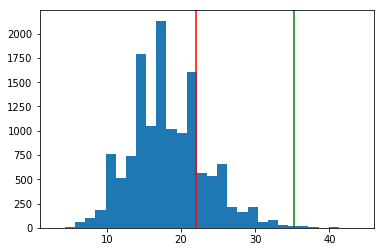

In [10]:
# distribution of saps score
plt.hist(y_train['saps'], bins=30)
plt.axvline(np.percentile(y_train['saps'], 80), color='r')
plt.axvline(y_train['saps'].max()*0.8, color='g');

Starting DOPS when dropping ['lactate', 'wbc', 'platelets', 'bun', 'creatinine']
Iter 20, theta: [0.32008244 0.31759345 0.29063584 0.30887881 0.28091834 0.32284862
 0.33465189 0.29144468 0.28621141 0.33482771 0.33655185 0.33793116
 0.29867341 0.31309418 0.29583695 0.33793116 0.32987345 0.28066679
 0.32382774 0.31551956 0.33886545 0.31719895 0.32282948 0.3355115
 0.32203859 0.33407238], gradient: [-0.0129684  -0.01322676 -0.01176376 -0.01244663 -0.01109562 -0.01333999
 -0.01326618 -0.01205769 -0.0113427  -0.01366643 -0.0137368  -0.0137931
 -0.01165098 -0.01276272 -0.01164528 -0.0137931  -0.01342951 -0.01140557
 -0.01333883 -0.01290453 -0.01370986 -0.01271668 -0.01285752 -0.0136947
 -0.01309164 -0.0136356 ]
Iter 40, theta: [0.51780743 0.51943116 0.47424221 0.51199593 0.47031619 0.54129102
 0.55289724 0.46531849 0.48254781 0.55650671 0.55937234 0.56166485
 0.47413206 0.51923417 0.48674276 0.56166485 0.5477094  0.44408863
 0.53417637 0.53661405 0.56726533 0.50487415 0.52868832 0.55615117
 

One repetition takes 26.574702978134155 seconds
Iter 20, theta: [0.31936641 0.29861027 0.29817032 0.32808967 0.30726257 0.32549054
 0.32832284 0.25641238 0.32380626 0.33694594 0.33793116 0.33793116
 0.29855724 0.2985544  0.28711912 0.33793116 0.32399265 0.30572502
 0.31620467 0.31234487 0.33476438 0.27870727 0.30044502 0.32814931
 0.3454714  0.33332173], gradient: [-0.01325259 -0.0117434  -0.01221418 -0.01316804 -0.01196908 -0.01299239
 -0.01351141 -0.01013224 -0.01350225 -0.01375289 -0.0137931  -0.0137931
 -0.01228103 -0.01220517 -0.01138149 -0.0137931  -0.01312685 -0.01283424
 -0.01280218 -0.01289069 -0.01364649 -0.01145652 -0.01192181 -0.01335913
 -0.0139883  -0.01357025]
Iter 40, theta: [0.52532051 0.48612974 0.49825552 0.54784387 0.50294319 0.54036515
 0.54298693 0.41707593 0.52667628 0.56002735 0.56166485 0.56166485
 0.4949505  0.48323507 0.47186868 0.56166485 0.53691935 0.50525042
 0.52386498 0.51567788 0.54966909 0.45906805 0.50238397 0.54484377
 0.57035684 0.55344068], gradien

One repetition takes 26.025810956954956 seconds
Iter 20, theta: [0.318408   0.30049832 0.2967125  0.33028642 0.32731372 0.32720623
 0.33103461 0.28167328 0.3037208  0.33793116 0.33793116 0.33793116
 0.29097106 0.30493273 0.29436016 0.33793116 0.31869943 0.29012008
 0.32327838 0.3055409  0.33103461 0.29749048 0.28248593 0.32825779
 0.33124455 0.33079299], gradient: [-0.01304074 -0.01196018 -0.01213016 -0.01352922 -0.01309512 -0.0133889
 -0.01351161 -0.01079746 -0.01206817 -0.0137931  -0.0137931  -0.0137931
 -0.0112486  -0.01250656 -0.01128226 -0.0137931  -0.01281196 -0.0113878
 -0.01320146 -0.01281378 -0.01351161 -0.01170599 -0.01120368 -0.013038
 -0.01346775 -0.01346704]
Iter 40, theta: [0.53533857 0.48723897 0.49890134 0.54116779 0.53275657 0.5447478
 0.54553263 0.44205485 0.49724709 0.56166485 0.56166485 0.56166485
 0.47200171 0.50267438 0.47036865 0.56166485 0.52575879 0.47083842
 0.53741526 0.51571733 0.54787437 0.46881273 0.44264864 0.53974317
 0.55543582 0.54923774], gradient: [-

One repetition takes 25.476841926574707 seconds
Iter 20, theta: [0.31307977 0.31036204 0.30199278 0.31998645 0.29041302 0.31333948
 0.34137944 0.28343676 0.2808192  0.33793116 0.33793116 0.33793116
 0.28800472 0.29567167 0.29499823 0.33793116 0.32041857 0.30620792
 0.31871229 0.31523687 0.32768894 0.32100204 0.29785035 0.32880303
 0.33396625 0.33562058], gradient: [-0.01300698 -0.01242686 -0.01182984 -0.01306657 -0.0109211  -0.0124691
 -0.01393385 -0.01112819 -0.01158259 -0.0137931  -0.0137931  -0.0137931
 -0.01139847 -0.01127113 -0.0117731  -0.0137931  -0.01235097 -0.01170153
 -0.01293924 -0.01278185 -0.01301442 -0.01299176 -0.01199308 -0.01332426
 -0.01390405 -0.01366408]
Iter 40, theta: [0.53062148 0.50802988 0.49256002 0.50956934 0.46213105 0.51879542
 0.56739613 0.4490363  0.45920741 0.56166485 0.56166485 0.56166485
 0.46006637 0.48511237 0.47841395 0.56166485 0.51443225 0.48362662
 0.52859581 0.53294304 0.54330259 0.52132175 0.48422824 0.53514746
 0.55521851 0.55726153], gradient

One repetition takes 25.895126819610596 seconds
Iter 20, theta: [0.30969427 0.30610921 0.29847756 0.30073984 0.29921658 0.34493792
 0.33571151 0.28526872 0.27248163 0.33793116 0.33793116 0.33793116
 0.28431375 0.29915446 0.32035102 0.33793116 0.32291356 0.31189523
 0.3229769  0.32566578 0.32235644 0.30442619 0.30312512 0.3206723
 0.33603461 0.32931047], gradient: [-0.01259566 -0.01269869 -0.01207112 -0.01232869 -0.01143214 -0.01416442
 -0.01330788 -0.01079443 -0.01101831 -0.0137931  -0.0137931  -0.0137931
 -0.01068677 -0.01207119 -0.01319563 -0.0137931  -0.01312808 -0.01196874
 -0.01314802 -0.01341796 -0.01313968 -0.01215977 -0.01199555 -0.01298344
 -0.01369798 -0.01344124]
Iter 40, theta: [0.5310602  0.50178408 0.49811722 0.4876777  0.47699066 0.56617642
 0.5537651  0.46109642 0.43736917 0.56166485 0.56166485 0.56166485
 0.4639704  0.48834831 0.5148034  0.56166485 0.53024697 0.49343471
 0.54257456 0.54640556 0.53620583 0.48960353 0.4852222  0.53728918
 0.55871039 0.54733667], gradient

One repetition takes 26.127224922180176 seconds
Iter 20, theta: [0.29441521 0.30243917 0.30313313 0.32433378 0.31880156 0.32004967
 0.33600374 0.28377848 0.30713009 0.33678174 0.33678174 0.33793116
 0.29979372 0.31428919 0.27413369 0.33793116 0.32240219 0.26815093
 0.32193421 0.29967031 0.33487345 0.30206204 0.29036732 0.33481139
 0.32798863 0.33579651], gradient: [-0.01202415 -0.01172943 -0.01213306 -0.01353479 -0.01288575 -0.01284254
 -0.01371988 -0.01180944 -0.01201638 -0.01374619 -0.01374619 -0.0137931
 -0.01199915 -0.01294433 -0.01083002 -0.0137931  -0.01312456 -0.01051532
 -0.01308774 -0.01216268 -0.01361587 -0.01225964 -0.01161751 -0.01351796
 -0.01336957 -0.01370597]
Iter 40, theta: [0.48891227 0.49848013 0.49212642 0.52591037 0.5282802  0.53375043
 0.56304259 0.45336905 0.50864101 0.55975443 0.55975443 0.56166485
 0.49572539 0.52213896 0.44020699 0.56166485 0.52210509 0.42911956
 0.53422647 0.48913179 0.5551396  0.4848739  0.46259318 0.54899017
 0.54485232 0.55811692], gradien

One repetition takes 25.954453945159912 seconds
Iter 20, theta: [0.31288163 0.30477719 0.29420873 0.2910597  0.30174198 0.29928712
 0.33931047 0.26288187 0.30751978 0.33620702 0.33620702 0.33793116
 0.29188455 0.29138763 0.31187321 0.33793116 0.34204329 0.30278128
 0.31410052 0.2967122  0.34379323 0.29212947 0.29278102 0.32780449
 0.34408645 0.33655185], gradient: [-0.01248977 -0.01214031 -0.01209729 -0.01144415 -0.0122491  -0.01207551
 -0.0138494  -0.01054006 -0.01265614 -0.01372273 -0.01372273 -0.0137931
 -0.01166891 -0.01175417 -0.01267781 -0.0137931  -0.01403036 -0.01241371
 -0.01273365 -0.01179813 -0.01403237 -0.01211833 -0.01186383 -0.01334506
 -0.01406169 -0.0137368 ]
Iter 40, theta: [0.51793452 0.50097539 0.48512689 0.48239471 0.50400515 0.49516028
 0.56395736 0.42822258 0.50791094 0.55879922 0.55879922 0.56166485
 0.48239001 0.4820485  0.51585866 0.56166485 0.56920897 0.49522937
 0.52064922 0.49340281 0.56537366 0.4825779  0.48522061 0.54427064
 0.57217687 0.55937234], gradien

One repetition takes 25.90193486213684 seconds
Iter 20, theta: [0.3057449  0.29543755 0.30904192 0.3007297  0.3092202  0.33037305
 0.33556898 0.26873104 0.31074133 0.33793116 0.33793116 0.33793116
 0.3150376  0.29392463 0.26770941 0.33793116 0.31721218 0.31559712
 0.32175945 0.29882371 0.33240219 0.30718759 0.30476085 0.32809771
 0.32808715 0.33195415], gradient: [-0.01237525 -0.0118257  -0.01274388 -0.01230157 -0.01268247 -0.01324802
 -0.01367933 -0.01083122 -0.01246552 -0.0137931  -0.0137931  -0.0137931
 -0.01267667 -0.01207587 -0.01062271 -0.0137931  -0.01284294 -0.01277738
 -0.01311568 -0.01207504 -0.01353272 -0.0126165  -0.01236943 -0.01337438
 -0.01337359 -0.01354914]
Iter 40, theta: [0.51221502 0.48041284 0.49857604 0.49722723 0.5205602  0.55158098
 0.55745724 0.4295974  0.51084742 0.56166485 0.56166485 0.56166485
 0.51051679 0.48348785 0.42369911 0.56166485 0.52315878 0.50505766
 0.53450486 0.51171961 0.53955027 0.48644052 0.49443191 0.54503948
 0.54379192 0.55173065], gradient

One repetition takes 25.717095851898193 seconds
Iter 20, theta: [0.31779862 0.30506637 0.33199476 0.34693464 0.30233781 0.3079833
 0.34282209 0.26560999 0.3148582  0.33476438 0.33620702 0.33793116
 0.28631122 0.30903483 0.2578631  0.33793116 0.33154012 0.3183792
 0.31945942 0.30039777 0.33067805 0.29403714 0.27482652 0.31394804
 0.32907472 0.3351092 ], gradient: [-0.0129193  -0.01209835 -0.01352501 -0.01416027 -0.0118925  -0.01228307
 -0.01401008 -0.0105718  -0.01274722 -0.01364649 -0.01372273 -0.0137931
 -0.01140591 -0.01254461 -0.01029942 -0.0137931  -0.01347982 -0.01297807
 -0.01296974 -0.01191571 -0.01344463 -0.0119804  -0.01104386 -0.01276214
 -0.01341426 -0.01366057]
Iter 40, theta: [0.5273587  0.50542073 0.53992839 0.56462868 0.49561751 0.51234033
 0.5700754  0.42413459 0.51858469 0.55611995 0.55879922 0.56166485
 0.48276191 0.51825197 0.41138846 0.56166485 0.54819298 0.51986614
 0.52983758 0.48358945 0.54364219 0.4697997  0.4431136  0.52095878
 0.55209256 0.55669307], gradient:

One repetition takes 25.071479082107544 seconds
Iter 20, theta: [0.31168873 0.30165824 0.29760945 0.31804903 0.30700567 0.31683334
 0.3358622  0.28244047 0.31567229 0.33793116 0.33793116 0.33793116
 0.29287941 0.31008312 0.29804676 0.33793116 0.3228843  0.29976371
 0.31829352 0.30266905 0.33735645 0.27131013 0.28448598 0.32814931
 0.33468931 0.33476438], gradient: [-0.01232026 -0.01189147 -0.0125002  -0.01287511 -0.01202808 -0.01287918
 -0.01370865 -0.01047779 -0.01266953 -0.0137931  -0.0137931  -0.0137931
 -0.01185469 -0.01214113 -0.01152028 -0.0137931  -0.01336962 -0.01168293
 -0.01271412 -0.01241605 -0.01376964 -0.00997979 -0.01138472 -0.01335913
 -0.01359136 -0.01364649]
Iter 40, theta: [0.51754208 0.48190265 0.49349293 0.52407501 0.49958586 0.53207032
 0.55189838 0.45016107 0.52206745 0.56166485 0.56166485 0.56166485
 0.48225345 0.50379758 0.49121131 0.56166485 0.53974877 0.48868772
 0.52452544 0.48792391 0.56070964 0.4331893  0.46973495 0.54484377
 0.55515071 0.55611995], gradien

One repetition takes 25.62042212486267 seconds
Used time: 258.37s


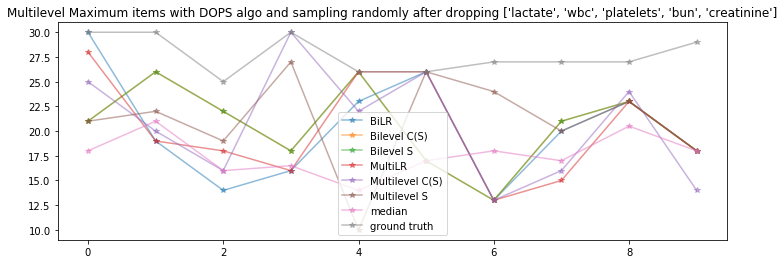

In [15]:
for i in range(1):
    measure = harder_measure[0:5]
    bi_cover, multi_cover = [], []
    for m in measure:
        bi_cover.append(bilevel_df.columns.get_loc(m))
        multi_cover.append(multilevel_df.columns.get_loc(m+'0'))
        multi_cover.append(multilevel_df.columns.get_loc(m+'1'))
    print("Starting DOPS when dropping " + str(measure))
            
    bi_preds = []
    bi_preds_lin = []
    bi_preds_cover_self = []
    multi_preds = []
    multi_preds_lin = []
    multi_preds_cover_self = []
    truths = []
    t1 = time.time()
    repeat = 10
    for i in range(repeat):
        start = time.time()
        np.random.seed(i)
        index = np.random.choice(len(multilevel_df), size=1000, replace=False)
        bi_x, multi_x, y = bilevel_df.iloc[index], multilevel_df.iloc[index], y_train.iloc[index]
        bi_x[measure] = 0
        multi_x[[m+'0' for m in measure]] = 1
        bi_x_train_dops = bi_x.values
        multi_x_train_dops = multi_x.values
        y_train_dops = y['saps'].values
        bi_X_train, bi_X_test,Y_train,Y_test = train_test_split(bi_x_train_dops,y_train_dops,test_size=0.02,random_state=i)
        multi_X_train, multi_X_test,Y_train,Y_test = train_test_split(multi_x_train_dops,y_train_dops,test_size=0.02,random_state=i)
        test_len = len(Y_test)
        bi_reg = LinearRegression().fit(bi_X_train, Y_train)
        bi_res0 = bi_reg.predict(bi_X_test)
        bi_pred_theta0 = bi_reg.coef_
        bi_res1, bi_pred_theta1, bi_max_item_index = dops(bi_X_train, Y_train, bi_X_test, manual_bilevel_coverage, test_len, 0.8, \
                                               np.zeros(len(manual_bilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=bi_cover)
        bi_res2, bi_pred_theta2, bi_max_item_index = dops(bi_X_train, Y_train, bi_X_test, np.eye(len(manual_bilevel_coverage)), test_len, 0.8, \
                                               np.zeros(len(manual_bilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=bi_cover)
        multi_reg = LinearRegression().fit(multi_X_train, Y_train)
        multi_res0 = multi_reg.predict(multi_X_test)
        multi_pred_theta0 = multi_reg.coef_
        multi_res1, multi_pred_theta1, multi_max_item_index = dops(multi_X_train, Y_train, multi_X_test, manual_multilevel_coverage, test_len, 0.8, \
                                               np.zeros(len(manual_multilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=multi_cover)
        multi_res2, multi_pred_theta2, multi_max_item_index = dops(multi_X_train, Y_train, multi_X_test, np.eye(len(manual_multilevel_coverage)), test_len, 0.8, \
                                               np.zeros(len(manual_multilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=multi_cover)
        bi_preds_lin.append(bi_res0)
        bi_preds.append(bi_res1)
        bi_preds_cover_self.append(bi_res2)
        multi_preds_lin.append(multi_res0)
        multi_preds.append(multi_res1)
        multi_preds_cover_self.append(multi_res2)
        truths.append(Y_test)
        end = time.time()
        print("One repetition takes {0} seconds".format(end-start))
    
    bi_pred = []
    bi_pred_lin = []
    bi_pred_cover_self = []
    multi_pred = []
    multi_pred_lin = []
    multi_pred_cover_self = []
    real = []
    rand = []
    for i in range(repeat):
        bi_pred.append(truths[i][np.argmax(bi_preds[i])])
        bi_pred_lin.append(truths[i][np.argmax(bi_preds_lin[i])])
        bi_pred_cover_self.append(truths[i][np.argmax(bi_preds_cover_self[i])])
        multi_pred.append(truths[i][np.argmax(multi_preds[i])])
        multi_pred_lin.append(truths[i][np.argmax(multi_preds_lin[i])])
        multi_pred_cover_self.append(truths[i][np.argmax(multi_preds_cover_self[i])])
        real.append(max(truths[i]))
        rand.append(np.median(truths[i]))
    t2 = time.time()
    print('Used time: %.2fs' % (t2-t1))

    plt.figure(figsize=(12,4))
    plt.plot(np.arange(0,repeat), bi_pred_lin, '*-', alpha=0.5, label='BiLR')
    plt.plot(np.arange(0,repeat), bi_pred, '*-', alpha=0.5, label='Bilevel C(S)')
    plt.plot(np.arange(0,repeat), bi_pred_cover_self, '*-', alpha=0.5, label='Bilevel S')
    plt.plot(np.arange(0,repeat), multi_pred_lin, '*-', alpha=0.5, label='MultiLR')
    plt.plot(np.arange(0,repeat), multi_pred, '*-', alpha=0.5, label='Multilevel C(S)')
    plt.plot(np.arange(0,repeat), multi_pred_cover_self, '*-', alpha=0.5, label='Multilevel S')
    plt.plot(np.arange(0,repeat), rand, '*-', alpha=0.5, label='median')
    plt.plot(np.arange(0,repeat), real, '*-', alpha=0.5, label='ground truth')
    plt.legend()
    plt.title('Multilevel Maximum items with DOPS algo and sampling randomly after dropping ' + str(measure))
    plt.show()
#     plt.savefig("Multilevel results after dropping " + str(measure))